**pixel-wise matching**

Problem 1: Xây dựng hàm tính disparity map của hai ảnh stereo đầu vào(ảnh bên trái(L) và ảnh bên phải(R)) theo phương thức pixel-wise mathching.

In [2]:
# Tải cặp ảnh Disparity Map từ cặp ảnh stereo cho trước
# https://drive.google.com/file/d/14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ/view
!gdown 14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ #Tsukuba

# https://drive.google.com/file/d/1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn/view
!gdown 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn #Aloe

Downloading...
From: https://drive.google.com/uc?id=14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ
To: /content/tsukuba.zip
100% 354k/354k [00:00<00:00, 85.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
To: /content/Aloe_images.zip
100% 1.32M/1.32M [00:00<00:00, 146MB/s]


In [3]:
!unzip "/content/Aloe_images.zip"
!unzip "/content/tsukuba.zip"

Archive:  /content/Aloe_images.zip
  inflating: Aloe/Aloe_left_1.png    
  inflating: Aloe/Aloe_right_3.png   
  inflating: Aloe/Aloe_right_1.png   
  inflating: Aloe/Aloe_right_2.png   
  inflating: Aloe/Disparity_map_corr.png  
Archive:  /content/tsukuba.zip
mapname:  conversion of  failed
 extracting: left.png                
 extracting: right.png               
 extracting: groundtruth.png         


In [4]:
import cv2
import math
import numpy as np

def distance_L1(x, y):
    return abs(x - y)

def distance_L2(x, y):
    return math.sqrt(np.sum((x - y)**2))

In [ ]:
# Đọc ảnh chụp bên trái(left) và ảnh chụp bên phải(right) dưới dạng ảnh grayscale(ảnh mức xám) đồng thời ép kiểu ảnh về np.float32)
#  Khởi tạo hai biến height, width có giá trị bằng chiều cao, chiều rộng của ảnh trái.

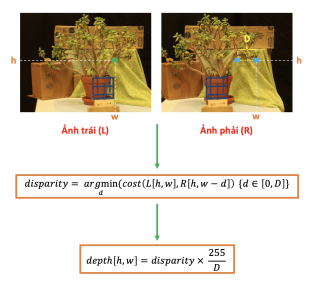

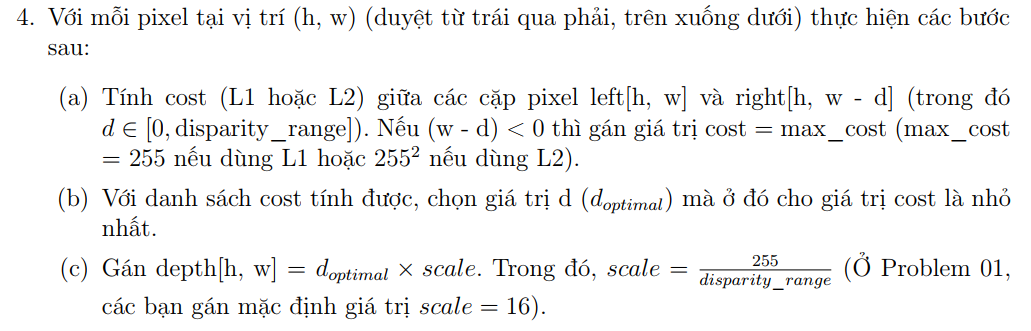

In [ ]:
# Khởi tạo một ma trận không - zero matrix(depth) với kích thước bằng height, width.
# Với mỗi pixel tại vị trí(h, w)(duyệt từ trái qua phải, trên xuống dưới) thực hiện các bướcsau:

In [5]:
def pixel_wise_matching(left_img,right_img,disparity_range,save_result = True):
    # Read left,right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img,0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height,width = left.shape[:2]
    # Create blank disparity map
    depth = np.zeros((height,width), np.uint8)

    # Calculate disparity for each pixel
    scale = 16
    max_value = 255
    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = max_value
            for j in range(disparity_range):
                cost = max_value if(x - j) < 0 else distance_L1(int(left[y, x]),int(right[y, x - j]))
                if cost < cost_min :
                    cost_min = cost
                    disparity = j
            # Let depth at(y, x) = j(disparity)
            # Multiply by a scale factor for visualization purpose
            depth [y, x] = disparity * scale

    if save_result == True:
        print('Saving result ...')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))
    print('Done.')
    return depth

Saving result ...
Done.


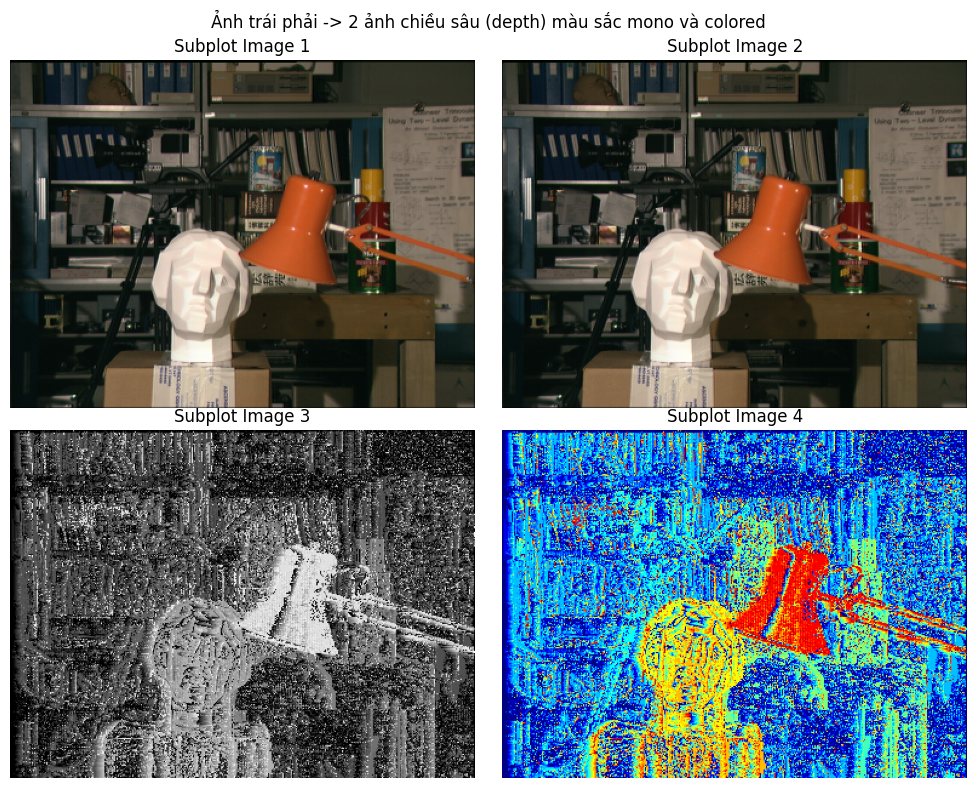

In [11]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

left_img_path ='/content/left.png'
right_img_path ='/content/right.png'
disparity_range = 16
depth_pixel_wise_result_l1 = pixel_wise_matching(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    save_result = True
   )

left_img = cv2.imread(left_img_path)
right_img = cv2.imread(right_img_path)

# Vẽ 4 ảnh bình thường
# cv2_imshow(left_img)
# cv2_imshow(right_img)

# cv2_imshow(depth_pixel_wise_result_l1)
# cv2_imshow(cv2.applyColorMap(depth_pixel_wise_result_l1, cv2.COLORMAP_JET))


# Vẽ 4 ảnh thành grid 2*2 = 4,sử dụng mathplotlib
# Bước 1: chuẩn bị hình ảnh
cv2.imwrite('depth_pixel_wise_result_l1.png', depth_pixel_wise_result_l1)

depth_pixel_wise_result_l1_colored_image = cv2.applyColorMap(depth_pixel_wise_result_l1, cv2.COLORMAP_JET)
cv2.imwrite('depth_pixel_wise_result_l1_colored_image.png', depth_pixel_wise_result_l1_colored_image)

# Bước 2: Khởi Tạo Figure và Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Ảnh trái phải -> 2 ảnh chiều sâu(depth) màu sắc mono và colored") # Tieu de chung

# Bước 3: Đọc và Hiển Thị Hình Ảnh trong Từng Subplot,dụa theo đường dẫn từng file
# Danh sách các đường dẫn tới các file hình ảnh
image_paths = ['/content/left.png','/content/right.png',
              '/content/depth_pixel_wise_result_l1.png','/content/depth_pixel_wise_result_l1_colored_image.png']

for i, ax in enumerate(axs.flat):  # Duyệt qua từng subplot
    img = cv2.imread(image_paths[i])            # Đọc hình ảnh bằng OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển BGR sang RGB để hiển thị đúng màu

    ax.imshow(img)                          # Hiển thị hình ảnh trong subplot
    ax.set_title(f"Subplot Image {i + 1}")  # Đặt tiêu đề cho từng subplot
    ax.axis('off')  # Tắt hiển thị các trục tọa độ

plt.tight_layout()  # Điều chỉnh bố cục để tránh các phần tử chồng chéo
plt.show()          # Hiển thị figure

# Saving result ...
# Done .
# pixel_wise_result_l2 = pixel_wise_matching_l2(
# left_img_path ,
# right_img_path ,
# disparity_range ,
# save_result = True
#)

**Disparity window-based matching**

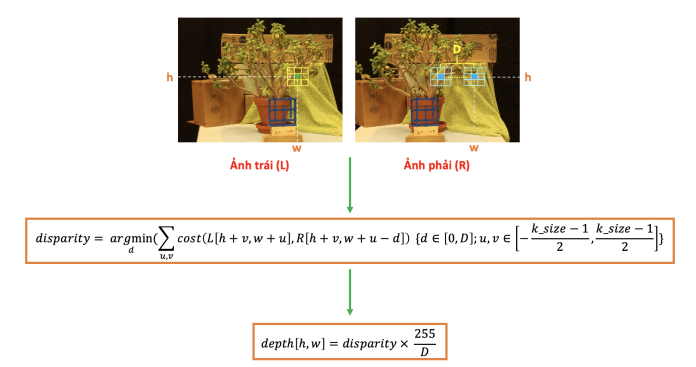

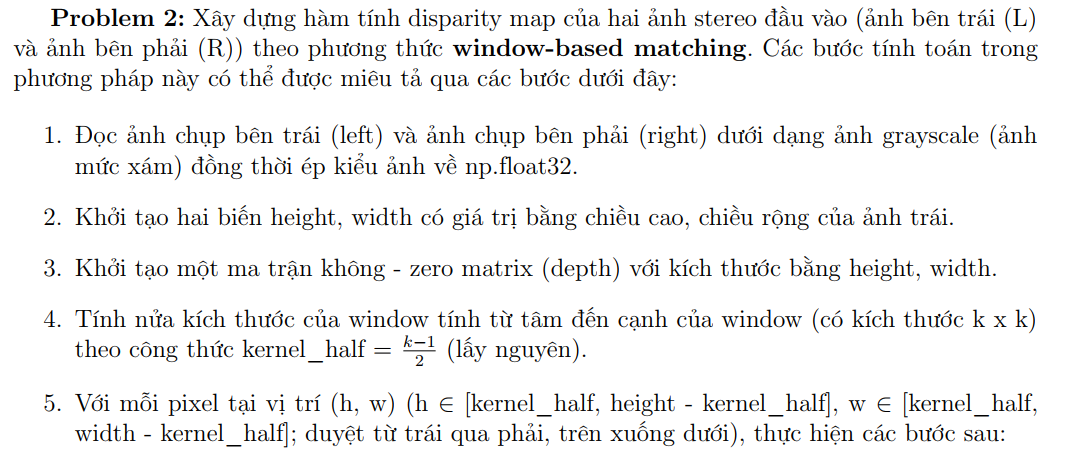

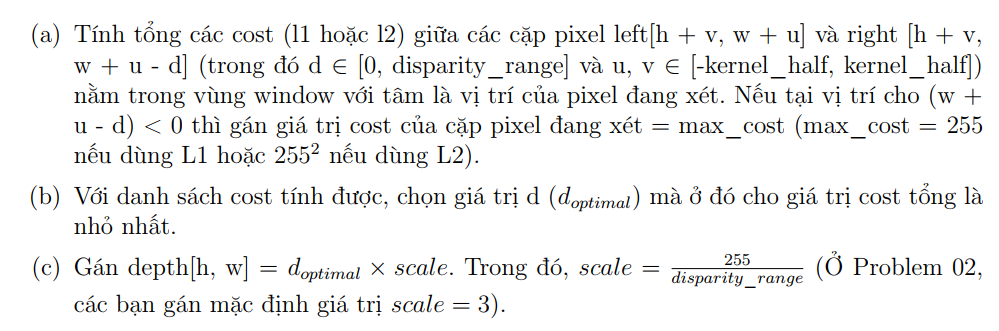

nếu hai ảnh trái và phải trong một hệ thống stereo bị lệch dòng(misalignment), tức là các hàng(rows) tương ứng giữa hai ảnh không khớp nhau, thì thuật toán window-based matching sẽ gặp khó khăn trong việc tìm kiếm disparity chính xác.

Lý do là vì thuật toán này giả định rằng các điểm tương ứng trong hai ảnh chỉ khác nhau theo chiều ngang(trục x), không có sự lệch hàng theo chiều dọc(trục y).Khi có sự lệch dòng ảnh, các cửa sổ được so sánh sẽ không nằm trên cùng một hàng, dẫn đến kết quả không chính xác.

-> Khắc phục:

1) Tiền xử lý: Sử dụng phép hiệu chỉnh ảnh(Rectification)  như OpenCV's stereoRectify để tính toán các ma trận chuyển đổi cần thiết.Sau đó, áp dụng các ma trận này lên hai ảnh để hiệu chỉnh chúng.

2) Một số thuật toán đối sánh stereo tiên tiến hơn có khả năng xử lý tốt hơn khi có sự lệch dòng, chẳng hạn như các phương pháp dựa trên đặc trưng(feature-based methods) hoặc các thuật toán học sâu(deep learning).Các phương pháp này có thể thực hiện đối sánh dựa trên* đặc trưng(feature matching)* thay vì chỉ dựa vào sự so khớp theo pixel hoặc cửa sổ, do đó chúng có thể xử lý được một số lượng nhất định sự lệch dòng.

In [17]:
import cv2
import numpy as np

def window_based_matching(left_img,right_img,disparity_range,kernel_size = 5, save_result = True):
# Read left,right images then convert to grayscale
    left  = cv2.imread(left_img,0)
    right = cv2.imread(right_img,0)
    left  = left.astype(np.float32)
    right = right.astype(np.float32)
    height,width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height,width), np.uint8)
    kernel_half = int(( kernel_size - 1) / 2)
    scale = 3
    max_value = 255*9 #

    for y in range(kernel_half,height - kernel_half):
        for x in range(kernel_half,width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534 #  giá trị lớn gần tối đa mà một biến 16-bit unsigned integer

            # Duyệt qua tất cả các giá trị trong phạm vi disparity(độ chênh lệch giữa các điểm tương ứng trên hai ảnh trái và phải)
            for j in range(disparity_range):
                total = 0
                value = 0
                for v in range(- kernel_half,kernel_half + 1):  # Duyệt theo chiều dọc của cửa sổ
                    for u in range(- kernel_half,kernel_half + 1):  # Duyệt theo chiều ngang của cửa sổ
                        value = max_value # Giả sử rằng giá trị đối sánh là tối đa(trường hợp không đối sánh được)

                        # Kiểm tra xem điểm sau khi dịch chuyển theo disparity(x + u - j) có nằm trong phạm vi hợp lệ của ảnh không
                        if(x + u - j) >= 0:
                             # Tính khoảng cách L1(tổng tuyệt đối sự khác biệt) giữa giá trị pixel tại vị trí tương ứng trên ảnh trái và ảnh phải
                            value = distance_L1(int(left [y + v, x + u]),int(right [y + v,(x + u) - j]))

                        # Cộng giá trị khoảng cách vào tổng chi phí
                        total += value

                if total < cost_min : # Kiểm tra nếu tổng chi phí của cửa sổ hiện tại nhỏ hơn chi phí tối thiểu tìm thấy trước đó
                    # Nếu có chi phí nhỏ hơn, cập nhật chi phí tối thiểu và disparity tương ứng
                    cost_min = total
                    disparity = j

        # Let depth at(y, x) = j(disparity)
        # Multiply by a scale factor for visualization purpose
        depth [y, x] = disparity * scale
    if save_result == True :
        print('Saving result ...')
        # Save results
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET))
    print('Done .')
    return depth

In [18]:
left_img_path ='/content/Aloe/Aloe_left_1.png'
right_img_path ='/content/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3
window_based_result = window_based_matching(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size = kernel_size ,
    save_result = True
    )


# # Saving result ...
# # Done .
# window_based_result = window_based_matching_l2(
# left_img_path ,
# right_img_path ,
# disparity_range ,
# kernel_size = kernel_size ,
# save_result = True
# )

Saving result ... 
Done .


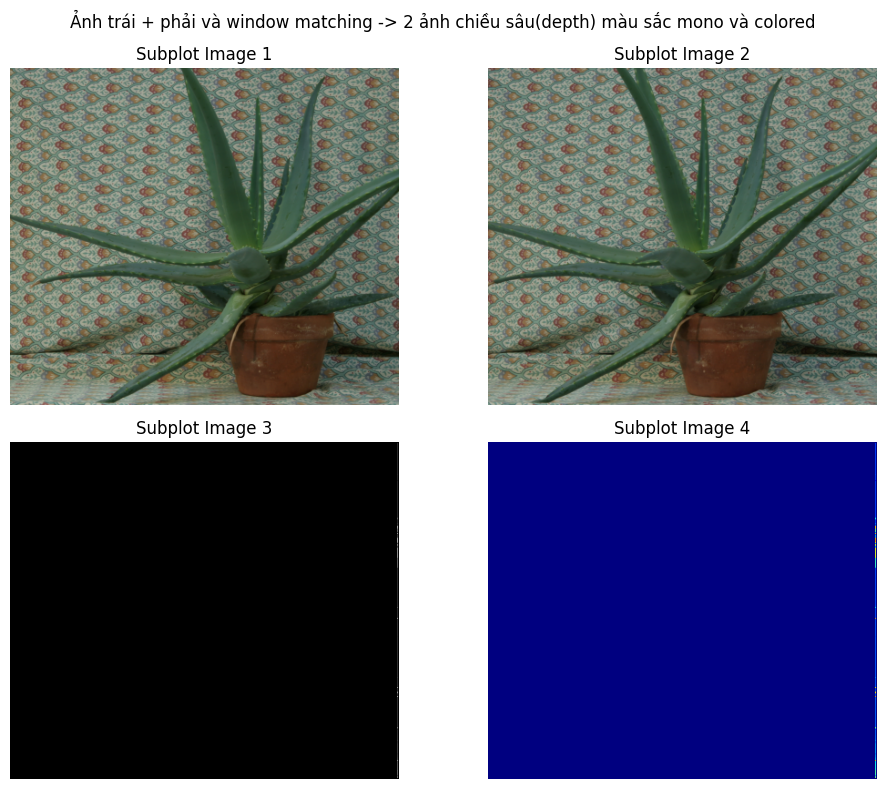

In [19]:
# Vẽ 4 ảnh thành grid 2*2 = 4,sử dụng mathplotlib
# Bước 1: chuẩn bị hình ảnh
cv2.imwrite('window_based_result.png', window_based_result)

window_based_result_colored_image = cv2.applyColorMap(window_based_result, cv2.COLORMAP_JET)
cv2.imwrite('window_based_result_colored_image.png', window_based_result_colored_image)

# Bước 2: Khởi Tạo Figure và Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Ảnh trái + phải và window matching -> 2 ảnh chiều sâu(depth) màu sắc mono và colored") # Tieu de chung

# Bước 3: Đọc và Hiển Thị Hình Ảnh trong Từng Subplot,dụa theo đường dẫn từng file
# Danh sách các đường dẫn tới các file hình ảnh
image_paths = [left_img_path, right_img_path,
              '/content/window_based_result.png','/content/window_based_result_colored_image.png']

for i, ax in enumerate(axs.flat):  # Duyệt qua từng subplot
    img = cv2.imread(image_paths[i])            # Đọc hình ảnh bằng OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển BGR sang RGB để hiển thị đúng màu

    ax.imshow(img)                          # Hiển thị hình ảnh trong subplot
    ax.set_title(f"Subplot Image {i + 1}")  # Đặt tiêu đề cho từng subplot
    ax.axis('off')  # Tắt hiển thị các trục tọa độ

plt.tight_layout()  # Điều chỉnh bố cục để tránh các phần tử chồng chéo
plt.show()          # Hiển thị figure

In [21]:
import cv2
import numpy as np
def cosine_similarity(x, y):
    numerator   = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    return numerator / denominator

def window_based_matching_cosine_similarity(left_img,right_img,disparity_range,kernel_size =5, save_result = True):
    # Read left,right images then convert to grayscale
    left = cv2.imread( left_img,0)
    right = cv2.imread( right_img,0)
    left = left.astype(np.float32 )
    right = right.astype(np.float32 )
    height,width = left.shape [:2]
    # Create blank disparity map
    depth = np.zeros(( height,width ), np.uint8 )
    kernel_half = int(( kernel_size - 1) / 2)
    scale = 3
    for y in range( kernel_half,height - kernel_half ):
        for x in range( kernel_half,width - kernel_half ):
            # Find j where cost has minimum value
            disparity = 0
            cost_optimal = -1
            for j in range( disparity_range ):
                d = x - j
                cost = -1
                if(d - kernel_half ) > 0:
                    wp = left [(y- kernel_half ):(y+ kernel_half )+1,(x - kernel_half):(x+ kernel_half)+1]
                    wqd = right [(y- kernel_half ):(y+ kernel_half )+1,(d - kernel_half):(d+ kernel_half)+1]
                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()
                    cost = cosine_similarity( wp_flattened,wqd_flattened )
                if cost > cost_optimal :
                    cost_optimal = cost
                    disparity = j

            # Let depth at(y, x) = j( disparity )
            # Multiply by a scale factor for visualization purpose
            depth [y, x] = disparity * scale
    if save_result == True :
        print('Saving result ...')
        # Save results
        cv2.imwrite('window_based_cosine_similarity.png', depth )
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth,cv2.COLORMAP_JET ))

    print('Done .')

    return depth

In [22]:
left_img_path ='/content/Aloe/Aloe_left_1.png'
right_img_path ='/content/Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3
window_based_cosine_result = window_based_matching_cosine_similarity(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size = kernel_size ,
    save_result = True
    )

Saving result ...
Done .


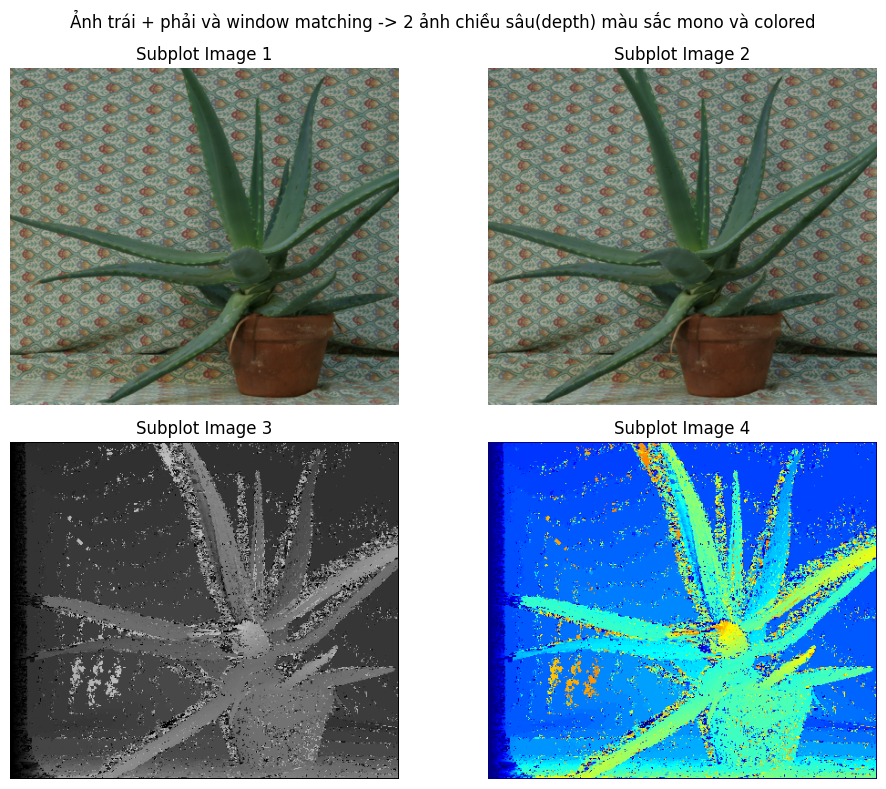

In [23]:
# Vẽ 4 ảnh thành grid 2*2 = 4,sử dụng mathplotlib
# Bước 1: chuẩn bị hình ảnh
cv2.imwrite('window_based_cosine_result.png', window_based_cosine_result)

window_based_cosine_result_colored_image = cv2.applyColorMap(window_based_cosine_result, cv2.COLORMAP_JET)
cv2.imwrite('window_based_cosine_result_colored_image.png', window_based_cosine_result_colored_image)

# Bước 2: Khởi Tạo Figure và Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Ảnh trái + phải và window matching -> 2 ảnh chiều sâu(depth) màu sắc mono và colored") # Tieu de chung

# Bước 3: Đọc và Hiển Thị Hình Ảnh trong Từng Subplot,dụa theo đường dẫn từng file
# Danh sách các đường dẫn tới các file hình ảnh
image_paths = [left_img_path, right_img_path,
              '/content/window_based_cosine_result.png','/content/window_based_cosine_result_colored_image.png']

for i, ax in enumerate(axs.flat):  # Duyệt qua từng subplot
    img = cv2.imread(image_paths[i])            # Đọc hình ảnh bằng OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển BGR sang RGB để hiển thị đúng màu

    ax.imshow(img)                          # Hiển thị hình ảnh trong subplot
    ax.set_title(f"Subplot Image {i + 1}")  # Đặt tiêu đề cho từng subplot
    ax.axis('off')  # Tắt hiển thị các trục tọa độ

plt.tight_layout()  # Điều chỉnh bố cục để tránh các phần tử chồng chéo
plt.show()          # Hiển thị figure